In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



In [78]:

df = pd.read_csv('dataset_final.csv')
df.head() 


,intensidad,carga,es_fin_de_semana,hubo_partido,es_festivo,periodo_dia_sin,periodo_dia_cos,mes_sin,mes_cos,dia_sin,dia_cos,hora_sin,hora_cos,minuto_sin,minuto_cos
0,0.036,0.01,1,0,1,0.0,1.0,0.5,0.866025,-0.974928,-0.222521,0.000000,1.000000,0.000000e+00,1.000000e+00
1,0.020,0.03,1,0,1,0.0,1.0,0.5,0.866025,-0.974928,-0.222521,0.000000,1.000000,1.000000e+00,2.832769e-16
2,0.040,0.01,1,0,1,0.0,1.0,0.5,0.866025,-0.974928,-0.222521,0.000000,1.000000,5.665539e-16,-1.000000e+00
3,0.012,0.03,1,0,1,0.0,1.0,0.5,0.866025,-0.974928,-0.222521,0.000000,1.000000,-1.000000e+00,-1.836970e-16
4,0.025,0.01,1,0,1,0.0,1.0,0.5,0.866025,-0.974928,-0.222521,0.258819,0.965926,0.000000e+00,1.000000e+00


In [79]:

X = df.drop(['intensidad', 'periodo_dia_sin','periodo_dia_cos','minuto_sin','minuto_cos'], axis=1)  # Eliminar la columna de intensidad para obtener las características
y = df['intensidad'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Datos de entrenamiento y prueba listos.")


Datos de entrenamiento y prueba listos.


In [80]:

model = LinearRegression()


model.fit(X_train, y_train)

print("Modelo entrenado.")


Modelo entrenado.


MSE: 0.007521239669582159
R^2: 0.7391110550787828


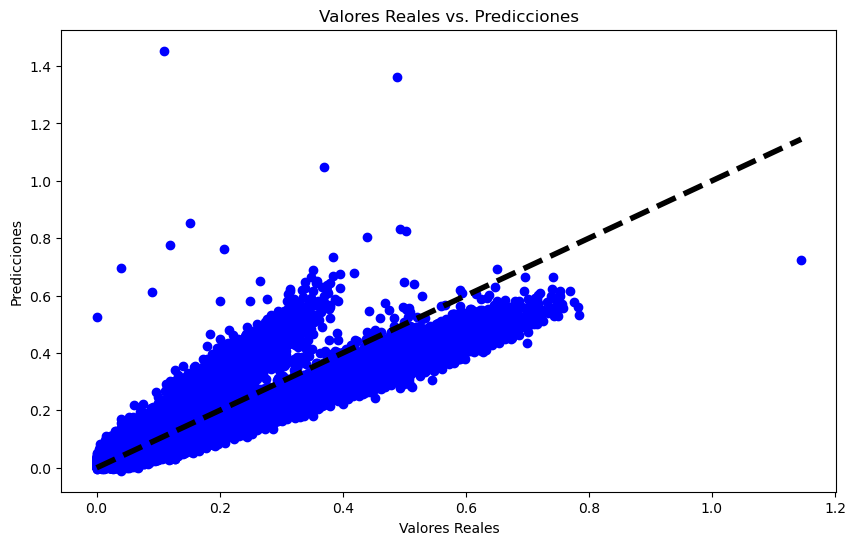

In [81]:

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R^2: {r2}")


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones')
plt.show()


In [98]:
import pandas as pd

input_data = {
    'carga': [1],  
    'es_fin_de_semana': [1],
    'hubo_partido': [0],
    'es_festivo': [1],
    'mes_sin': [0.5],  
    'mes_cos': [0.866],
    'dia_sin': [-0.9749],  
    'dia_cos': [-0.2225],
    'hora_sin': [0.0],  
    'hora_cos': [1.0],
    
}


input_df = pd.DataFrame(input_data)


ordered_columns = [
    'carga', 'es_fin_de_semana', 'hubo_partido', 'es_festivo', 'mes_sin', 'mes_cos', 
    'dia_sin', 'dia_cos', 'hora_sin', 'hora_cos',
]
input_df = input_df[ordered_columns]


predicted_intensity = model.predict(input_df)
print(f"La intensidad del tráfico predicha es: {predicted_intensity[0]}")


La intensidad del tráfico predicha es: 1.4927579551717396


Intensidad media en días festivos: 0.1086671322160149
Intensidad media en días no festivos: 0.20363698064673114


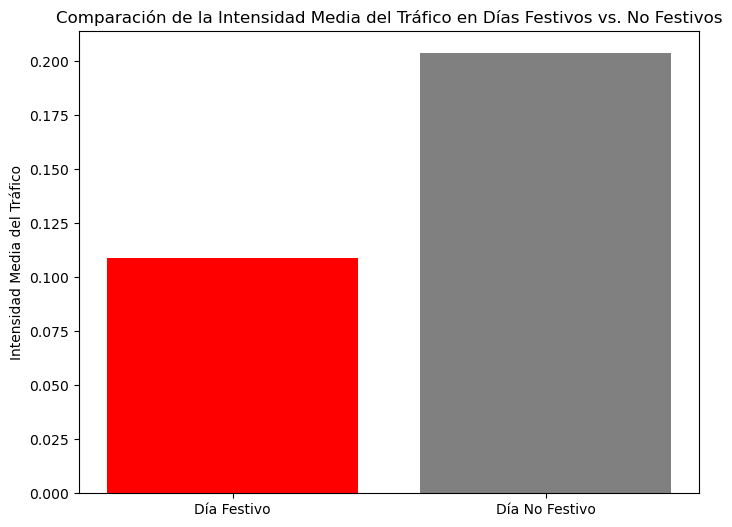

In [83]:
import matplotlib.pyplot as plt

# visualización 
df_festivo = df[df['es_festivo'] == 1]
df_no_festivo = df[df['es_festivo'] == 0]

intensidad_media_festivo = df_festivo['intensidad'].mean()
intensidad_media_no_festivo = df_no_festivo['intensidad'].mean()


print(f"Intensidad media en días festivos: {intensidad_media_festivo}")
print(f"Intensidad media en días no festivos: {intensidad_media_no_festivo}")


labels = ['Día Festivo', 'Día No Festivo']
intensidades = [intensidad_media_festivo, intensidad_media_no_festivo]

plt.figure(figsize=(8, 6))
plt.bar(labels, intensidades, color=['red', 'gray'])
plt.ylabel('Intensidad Media del Tráfico')
plt.title('Comparación de la Intensidad Media del Tráfico en Días Festivos vs. No Festivos')
plt.show()

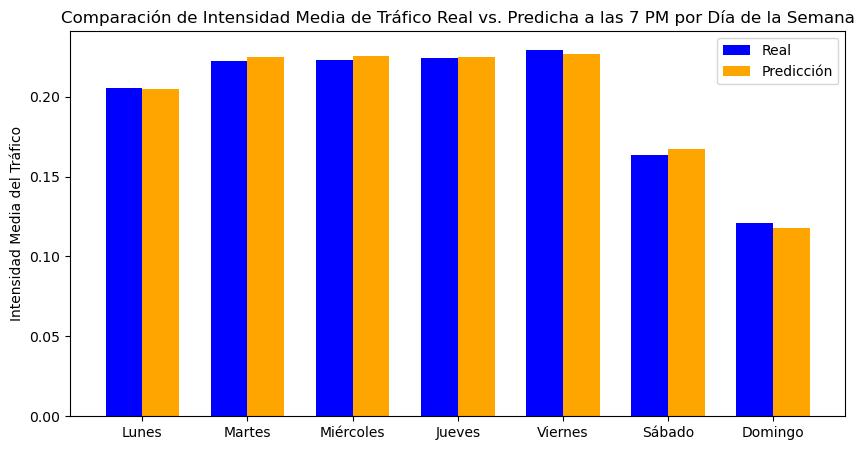

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import atan2, pi



def convert_to_day_index(sin_val, cos_val):
    angle = atan2(sin_val, cos_val)
    day_index = int(np.round((angle % (2 * pi)) / (2 * pi / 7))) % 7
    return day_index


X_test['day_index'] = X_test.apply(lambda row: convert_to_day_index(row['dia_sin'], row['dia_cos']), axis=1)
results = pd.DataFrame({'real': y_test, 'predicted': y_pred, 'day_index': X_test['day_index']})


summary = results.groupby('day_index').agg({'real': 'mean', 'predicted': 'mean'}).reset_index()


day_names = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
summary['day_index'] = summary['day_index'].apply(lambda x: day_names[x])


plt.figure(figsize=(10, 5))
width = 0.35  
ind = np.arange(len(summary))  
p1 = plt.bar(ind - width/2, summary['real'], width, label='Real', color='blue')
p2 = plt.bar(ind + width/2, summary['predicted'], width, label='Predicción', color='orange')

plt.ylabel('Intensidad Media del Tráfico')
plt.title('Comparación de Intensidad Media de Tráfico Real vs. Predicha a las 7 PM por Día de la Semana')
plt.xticks(ind, summary['day_index'])
plt.legend()

plt.show()


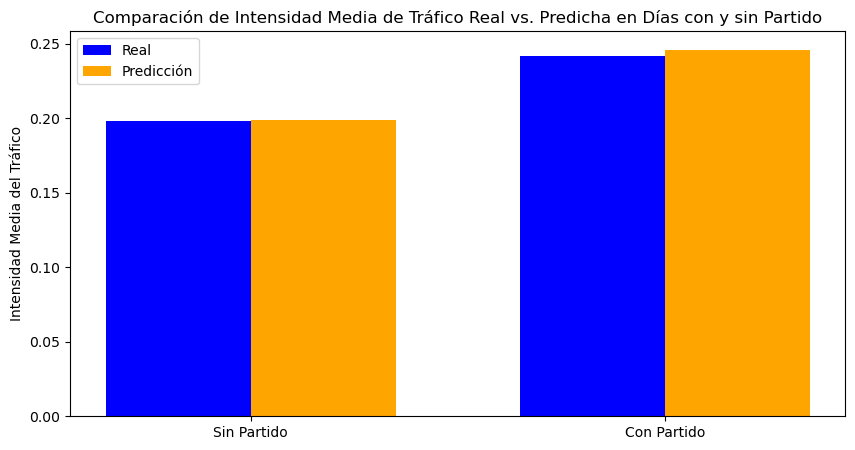

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd




results = pd.DataFrame({'real': y_test, 'predicted': y_pred, 'hubo_partido': X_test['hubo_partido']})


summary = results.groupby('hubo_partido').agg({'real': 'mean', 'predicted': 'mean'}).reset_index()

summary['hubo_partido'] = summary['hubo_partido'].apply(lambda x: 'Con Partido' if x == 1 else 'Sin Partido')

# Graficar
plt.figure(figsize=(10, 5))
width = 0.35  
ind = np.arange(len(summary))  
p1 = plt.bar(ind - width/2, summary['real'], width, label='Real', color='blue')
p2 = plt.bar(ind + width/2, summary['predicted'], width, label='Predicción', color='orange')

plt.ylabel('Intensidad Media del Tráfico')
plt.title('Comparación de Intensidad Media de Tráfico Real vs. Predicha en Días con y sin Partido')
plt.xticks(ind, summary['hubo_partido'])
plt.legend()

plt.show()


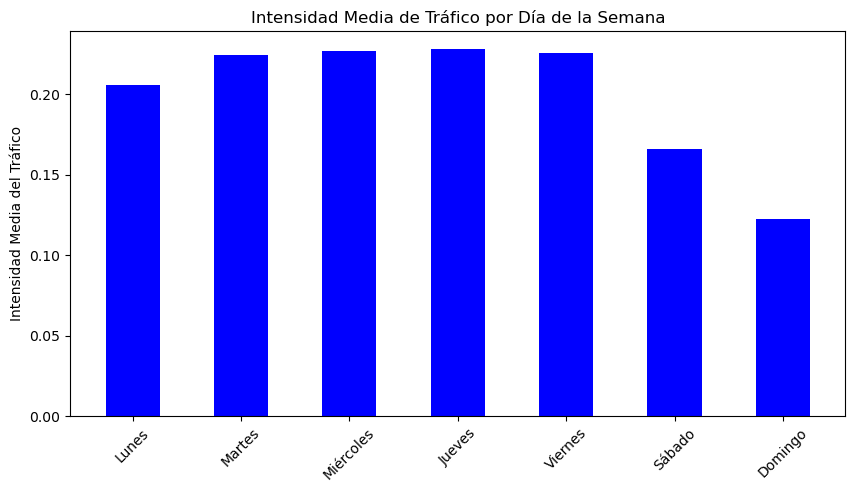

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import atan2, pi


df = pd.read_csv('dataset_final.csv')


def convert_to_day_index(sin_val, cos_val):
    angle = atan2(sin_val, cos_val)
    day_index = int(np.round((angle % (2 * pi)) / (2 * pi / 7))) % 7
    return day_index


df['day_index'] = df.apply(lambda row: convert_to_day_index(row['dia_sin'], row['dia_cos']), axis=1)


summary = df.groupby('day_index').agg({'intensidad': 'mean'}).reset_index()


day_names = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
summary['day_index'] = summary['day_index'].apply(lambda x: day_names[x])


plt.figure(figsize=(10, 5))
plt.bar(summary['day_index'], summary['intensidad'], color='blue', width=0.5)

plt.ylabel('Intensidad Media del Tráfico')
plt.title('Intensidad Media de Tráfico por Día de la Semana')
plt.xticks(rotation=45)
plt.show()


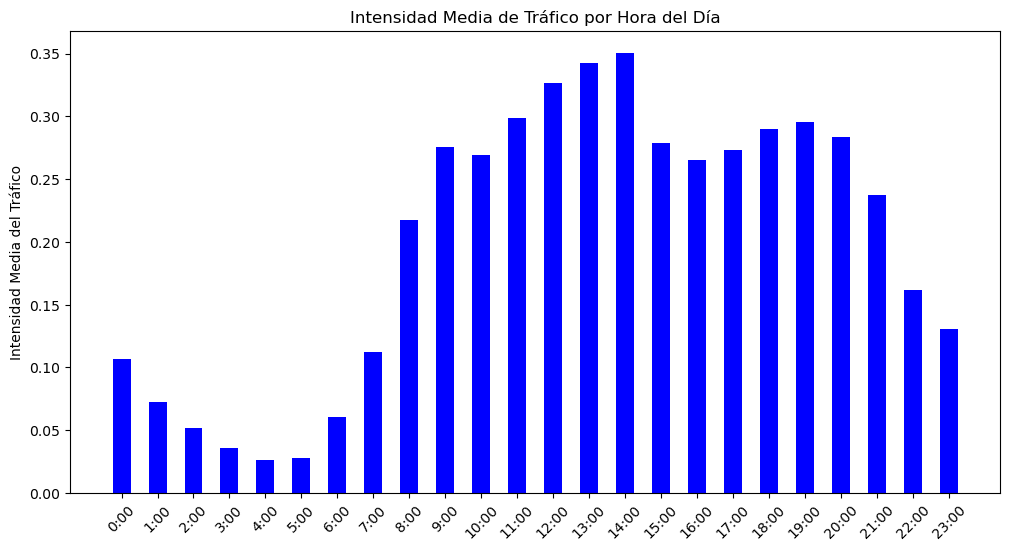

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import atan2, pi


df = pd.read_csv('dataset_final.csv')


def convert_to_hour_index(sin_val, cos_val):
    angle = atan2(sin_val, cos_val)
    hour_index = int(np.round((angle % (2 * pi)) / (2 * pi / 24))) % 24
    return hour_index


df['hour_index'] = df.apply(lambda row: convert_to_hour_index(row['hora_sin'], row['hora_cos']), axis=1)


summary = df.groupby('hour_index').agg({'intensidad': 'mean'}).reset_index()

hour_names = [f'{hour}:00' for hour in range(24)]
summary['hour_index'] = summary['hour_index'].apply(lambda x: hour_names[x])


plt.figure(figsize=(12, 6))
plt.bar(summary['hour_index'], summary['intensidad'], color='blue', width=0.5)

plt.ylabel('Intensidad Media del Tráfico')
plt.title('Intensidad Media de Tráfico por Hora del Día')
plt.xticks(rotation=45)
plt.show()


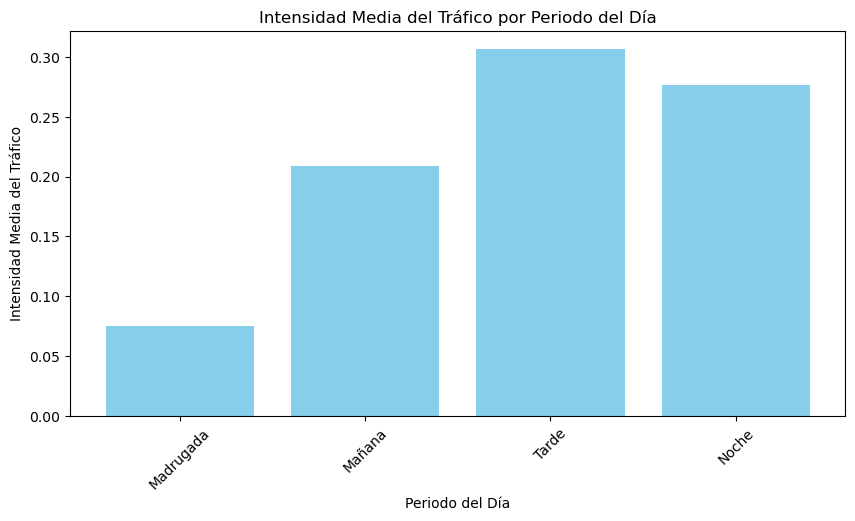

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import atan2, pi


df = pd.read_csv('dataset_final.csv')


def convert_to_period_index(sin_val, cos_val):
    angle = atan2(sin_val, cos_val) 
    period_index = int(np.round(4 * angle / (2 * pi)) % 4) 
    return period_index


df['period_index'] = df.apply(lambda row: convert_to_period_index(row['periodo_dia_sin'], row['periodo_dia_cos']), axis=1)


period_names = {0: 'Madrugada', 1: 'Mañana', 2: 'Tarde', 3: 'Noche'}
df['period_name'] = df['period_index'].map(period_names)

summary = df.groupby('period_name')['intensidad'].mean().reset_index()


summary['period_index'] = pd.Categorical(summary['period_name'], categories=period_names.values(), ordered=True)
summary = summary.sort_values('period_index')


plt.figure(figsize=(10, 5))
plt.bar(summary['period_name'], summary['intensidad'], color='skyblue')
plt.ylabel('Intensidad Media del Tráfico')
plt.title('Intensidad Media del Tráfico por Periodo del Día')
plt.xlabel('Periodo del Día')
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visualización
plt.show()


Intensidad media cuando hubo partido: 0.25156955571740713
Intensidad media cuando NO hubo partido: 0.19900991245144528


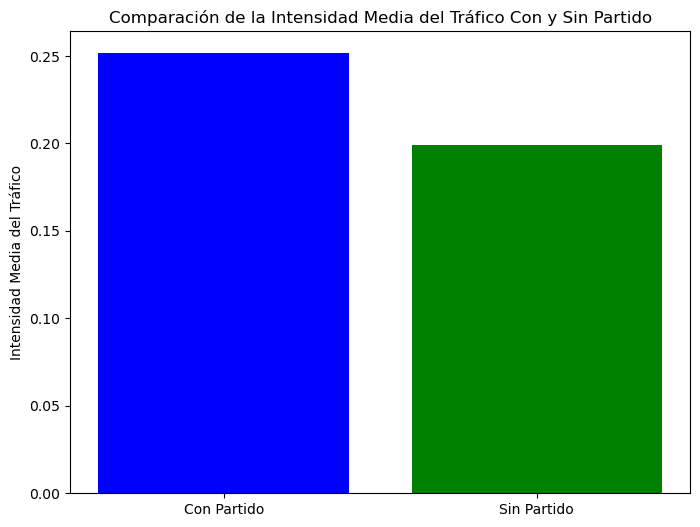

In [89]:
import matplotlib.pyplot as plt


df_partido = df[df['hubo_partido'] == 1]
df_no_partido = df[df['hubo_partido'] == 0]


intensidad_media_partido = df_partido['intensidad'].mean()
intensidad_media_no_partido = df_no_partido['intensidad'].mean()


print(f"Intensidad media cuando hubo partido: {intensidad_media_partido}")
print(f"Intensidad media cuando NO hubo partido: {intensidad_media_no_partido}")

labels = ['Con Partido', 'Sin Partido']
intensidades = [intensidad_media_partido, intensidad_media_no_partido]

plt.figure(figsize=(8, 6))
plt.bar(labels, intensidades, color=['blue', 'green'])
plt.ylabel('Intensidad Media del Tráfico')
plt.title('Comparación de la Intensidad Media del Tráfico Con y Sin Partido')
plt.show()

In [92]:
import joblib


joblib.dump(model, 'traffic_model.pkl')

['traffic_model.pkl']

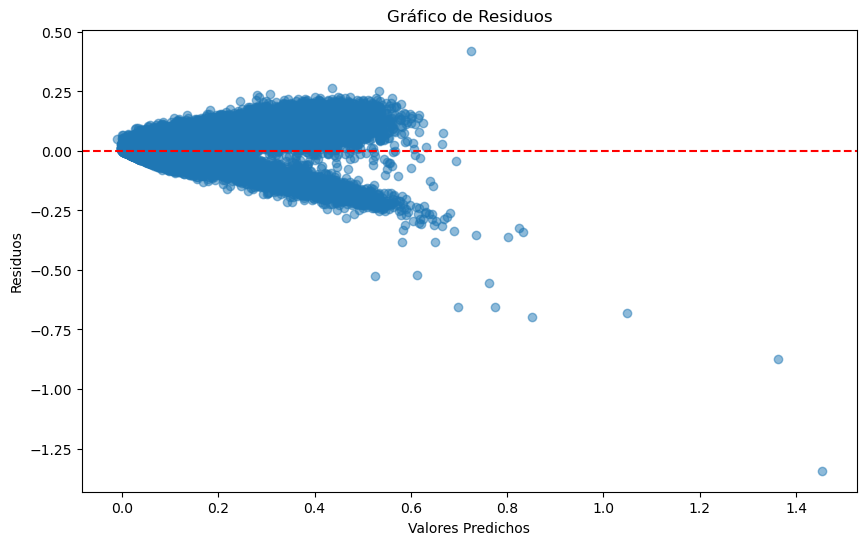

In [93]:
import matplotlib.pyplot as plt


residuos = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.show()


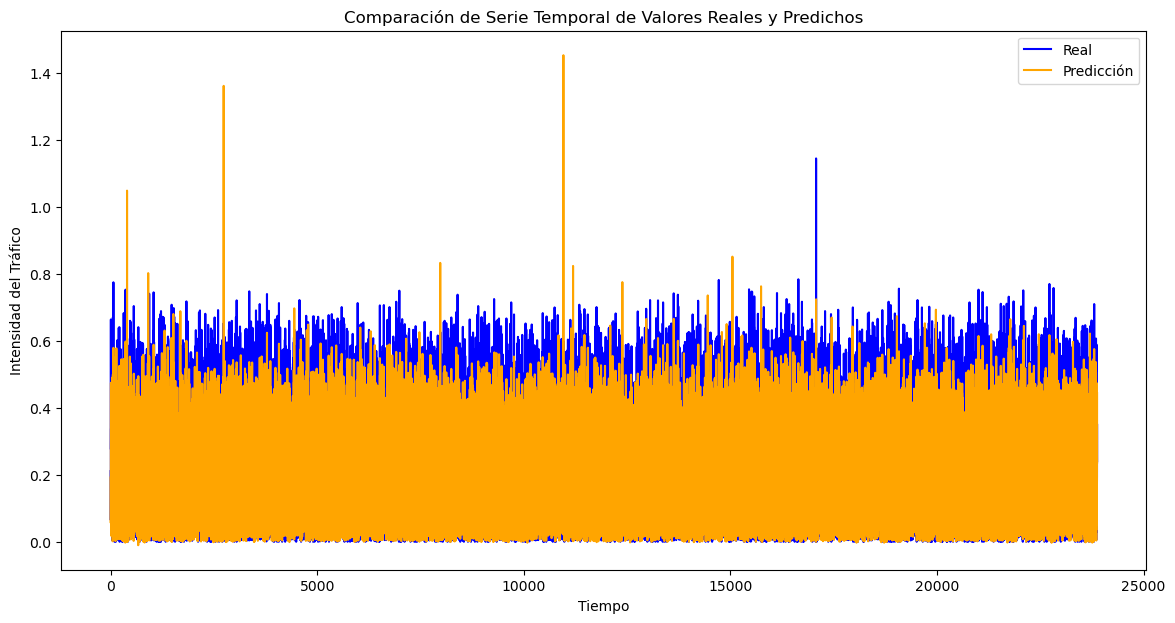

In [94]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.reset_index(drop=True), label='Real', color='blue')
plt.plot(y_pred, label='Predicción', color='orange')
plt.xlabel('Tiempo')
plt.ylabel('Intensidad del Tráfico')
plt.title('Comparación de Serie Temporal de Valores Reales y Predichos')
plt.legend()
plt.show()
